In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

In [20]:
X, y = datasets.make_circles(200, noise=.05)

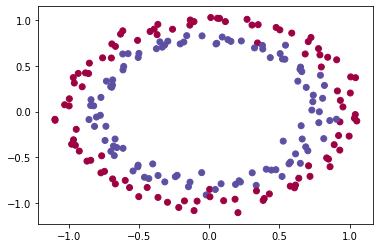

In [21]:
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.Spectral)

In [22]:
X = torch.FloatTensor(X)
y = torch.LongTensor(y)

In [23]:
print(X.shape)
print(y.shape)

torch.Size([200, 2])
torch.Size([200])


In [24]:
class Model(nn.Module):
    def __init__(self, no_inputs, no_hiddens, no_outputs):
        super(Model, self).__init__()
        self.hidden = nn.Linear(no_inputs, no_hiddens)
        self.hidden2 = nn.Linear(no_hiddens, no_hiddens)
        self.out = nn.Linear(no_hiddens, no_outputs)
        
    def forward(self, x):
        out = self.hidden(x)
        out = F.relu(out)
        out = self.hidden2(out)
        out = F.relu(out)
        out = self.out(out)
        return out

In [25]:
network = Model(no_inputs=2, no_hiddens=100, no_outputs=2)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(network.parameters(), lr=0.002)

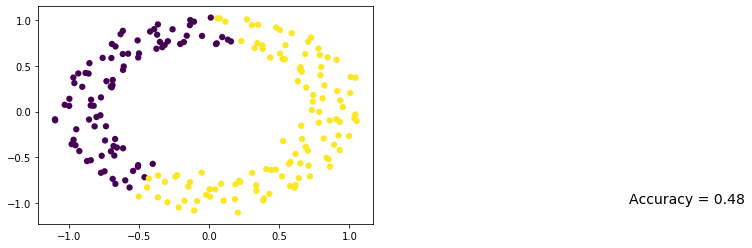

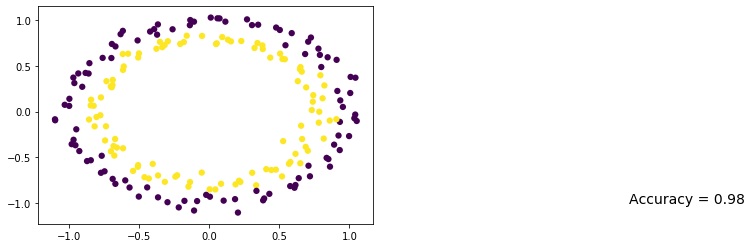

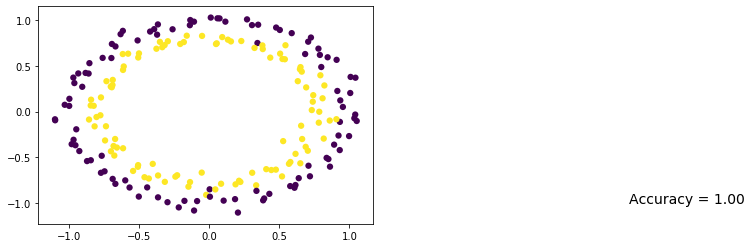

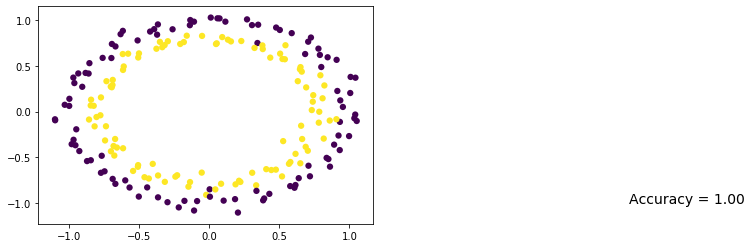

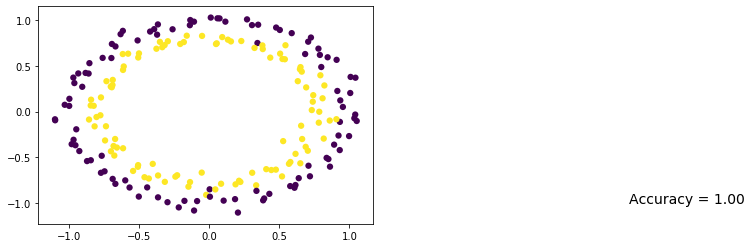

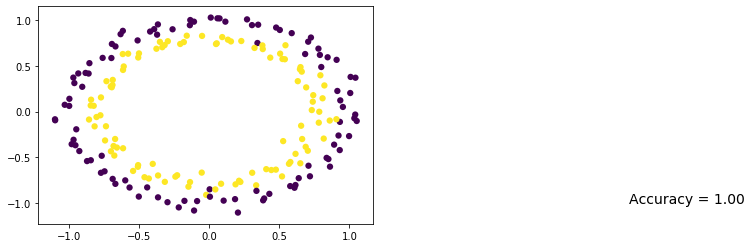

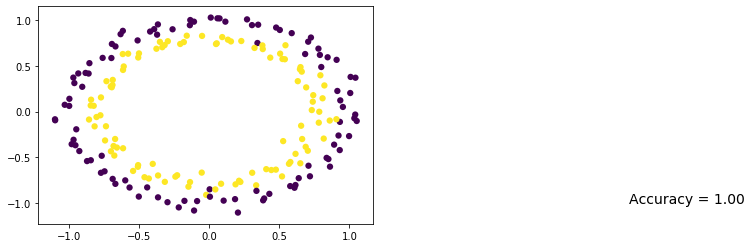

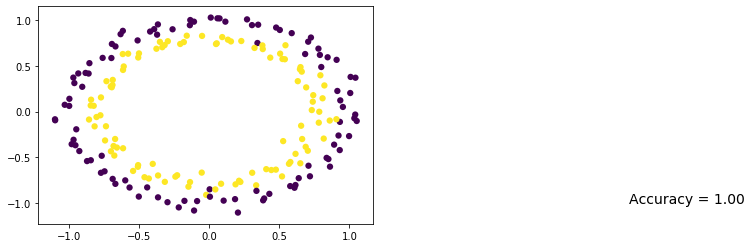

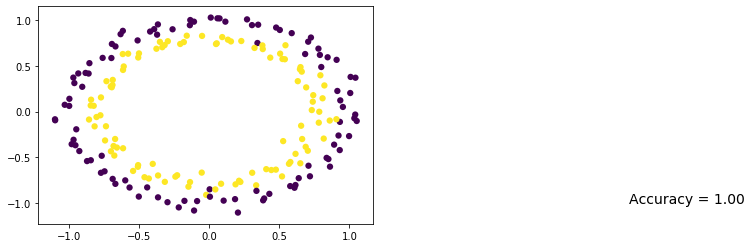

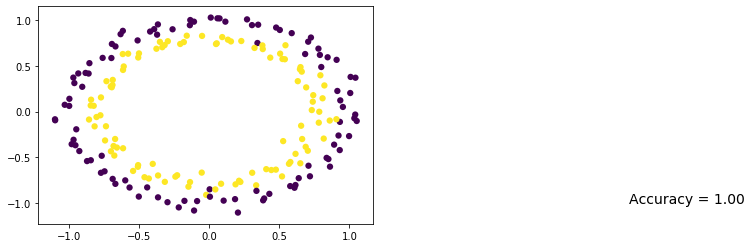

In [26]:
plt.ion()
for epoch in range(10000):
    out = network(X)
    loss = loss_fn(out, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
        max_value, prediction = torch.max(out, 1)
        predicted_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(X.data.numpy()[:,0], X.data.numpy()[:,1], s=40, c=predicted_y, lw=0)
        accuracy = (predicted_y == target_y).sum()/target_y.size
        plt.text(3,-1,'Accuracy = {:.2f}'.format(accuracy), fontdict={'size':14})
        plt.pause(0.1)
        
plt.ioff()
plt.show()

In [21]:
datasets.make_blobs(200)

(array([[ 3.04818186e-01,  3.55611717e+00],
        [ 8.15443461e+00, -6.85671276e+00],
        [-7.11396024e-01,  3.24634052e+00],
        [ 8.27195615e+00, -8.95243874e+00],
        [ 6.72474047e+00, -8.31244741e+00],
        [ 9.69785942e+00, -1.03352571e+01],
        [ 5.89545034e+00, -7.65095481e+00],
        [-1.69824195e+00,  4.72662666e+00],
        [ 7.69020083e+00, -8.02953518e+00],
        [-2.33513555e+00,  3.97610334e+00],
        [ 3.43733385e+00, -7.01994503e+00],
        [ 6.09355385e+00, -7.00154847e+00],
        [-2.73087847e+00,  3.54785758e+00],
        [-1.50315239e+00,  3.54673946e+00],
        [-4.68658484e-01,  1.15407618e+00],
        [ 6.38715850e+00, -6.19874878e+00],
        [ 1.07154304e+01, -9.83478069e+00],
        [ 1.03151057e+01, -1.10006981e+01],
        [ 4.56554897e+00, -9.34961900e+00],
        [ 1.03225958e+01, -8.36661611e+00],
        [ 6.41912282e+00, -6.54315398e+00],
        [ 1.07028680e+01, -1.15903149e+01],
        [ 5.98886185e+00, -7.904